# Chest CT Scan - Computer Vision - Classification 
# Exploratory Analysis (step 1)

Dataset origin: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images

In this notebook we will explore the training and validation images. In the next notebook, we will build a classification model using computer vision, transfer learning, and deep learning techniques.  

## The Data: 
We are given three folders labeled train, valid, and test, which contain 70%, 10% and 20% of the data, respectively. Each set of data contains images of cancer and non-cancerous findings. Within the cancer outcomes, there are three classes: Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma. Therefore, in total, we have four possible outcomes (3 cancerous and 1 non-cancerous). 

Since we do not have a very large dataset (only 1000 images total) we will also need to use augmentation techniques to bring greater variety to the dataset. 

In [147]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2
from skimage import io

In [148]:
# Set directories
test_dir = "/kaggle/input/chest-ctscan-images/Data/test"
train_dir = "/kaggle/input/chest-ctscan-images/Data/train"
valid_dir = "/kaggle/input/chest-ctscan-images/Data/valid"

In [149]:
# train sets
for files in os.listdir(train_dir):
    print(os.path.join(train_dir,files))

print('\n')
# valid sets
for files in os.listdir(valid_dir):
    print(os.path.join(valid_dir,files))

print('\n')
# test sets
for files in os.listdir(test_dir):
    print(os.path.join(test_dir,files))

/kaggle/input/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
/kaggle/input/chest-ctscan-images/Data/train/normal
/kaggle/input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
/kaggle/input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
/kaggle/input/chest-ctscan-images/Data/valid/normal
/kaggle/input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
/kaggle/input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


/kaggle/input/chest-ctscan-images/Data/test/squamous.cell.carcinoma
/kaggle/input/chest-ctscan-images/Data/test/normal
/kaggle/input/chest-ctscan-images/Data/test/adenocarcinoma
/kaggle/input/chest-ctscan-images/Data/test/large.cell.carcinoma


# Get the data

First, let's make a dataframe for the training and validation data. Since this notebook is just for visualization purposes, we don't want to mess with the testing data. It's bad practice to get really familiar with the testing data because it can bias us as we do our modeling and analysis. After we have made a dataframe, we will do some slight preprocessing and then lot's of visualizations. At the end of the notebook, we also will visualize some samples of the actual images too!

In [155]:
train_val_images = []
#create csv for data
for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir,folder)): 
        image_arr = cv2.imread(os.path.join(train_dir,folder,file))
        train_val_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'train'})
        
for folder in os.listdir(valid_dir):
    for file in os.listdir(os.path.join(valid_dir,folder)): 
        image_arr = cv2.imread(os.path.join(valid_dir,folder,file))
        train_val_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'valid'})

# uncomment this if you would like to add the test data too
# test_images = []
# for folder in os.listdir(test_dir):
#     for file in os.listdir(os.path.join(test_dir,folder)): 
#         image_arr = cv2.imread(os.path.join(test_dir,folder,file))
#         test_images.append({'image':file, 
#                        'type':folder, 
#                        'image_dimensions':image_arr.shape,
#                        'image_height':image_arr.shape[0],
#                        'image_width':image_arr.shape[1],
#                        'image_channels':image_arr.shape[2],
#                        'set':'test'})

In [156]:
#create dataframe of all data
train_val_df = pd.DataFrame(train_val_images)
del train_val_images
#rename types (for easier readability)
train_val_df['type_extended'] = train_val_df['type']
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'squamous_cell_carcinoma' if 'squamous' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'large_cell_carcinoma' if 'large' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'adeno_carcinoma' if 'adeno' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'normal' if 'normal' in string else string)
train_val_df.head(5)

,image,type,image_dimensions,image_height,image_width,image_channels,set,type_extended
0,000037 (2).png,squamous_cell_carcinoma,"(288, 426, 3)",288,426,3,train,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
1,000083 (6).png,squamous_cell_carcinoma,"(260, 352, 3)",260,352,3,train,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
2,000121.png,squamous_cell_carcinoma,"(237, 376, 3)",237,376,3,train,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
3,000085.png,squamous_cell_carcinoma,"(261, 375, 3)",261,375,3,train,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
4,000041 (4).png,squamous_cell_carcinoma,"(256, 352, 3)",256,352,3,train,squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [182]:
train_val_df.describe()

,image_height,image_width,image_channels
count,685.000000,685.000000,685.0
mean,302.912409,436.039416,3.0
std,107.160048,134.039784,0.0
min,110.000000,168.000000,3.0
25%,242.000000,376.000000,3.0
50%,271.000000,407.000000,3.0
75%,314.000000,438.000000,3.0
max,874.000000,1200.000000,3.0


In [183]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image             685 non-null    object
 1   type              685 non-null    object
 2   image_dimensions  685 non-null    object
 3   image_height      685 non-null    int64 
 4   image_width       685 non-null    int64 
 5   image_channels    685 non-null    int64 
 6   set               685 non-null    object
 7   type_extended     685 non-null    object
 8   file_type         685 non-null    object
dtypes: int64(3), object(6)
memory usage: 48.3+ KB


Great! We have made our training-validation. I went ahead and double checked our outputs as well. We have 685 images to train the data with. We also see that they are all 3 channel images. Let's move on to visualizations!

# Visualizations

In [157]:
# set visualization defaults
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['xtick.color'] = 'dimgrey'
plt.rcParams['ytick.color'] = 'dimgrey'
plt.rcParams['axes.labelcolor'] = 'dimgrey'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

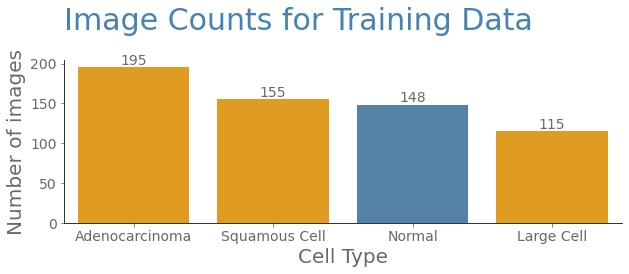

In [158]:
# visualize data
plt.figure(figsize=(10,3))

plot = sns.countplot(data=train_val_df[train_val_df['set']=='train'], 
              x='type',
              order=train_val_df['type'].value_counts().index,
              palette={'squamous_cell_carcinoma':'orange', 
                     'normal':'steelblue', 
                     'large_cell_carcinoma':'orange',
                     'adeno_carcinoma':'orange'})
plt.title('Image Counts for Training Data', loc='left', color='steelblue')
plt.xlabel('Cell Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['Adenocarcinoma', 'Squamous Cell', 'Normal', 'Large Cell'])
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='dimgrey', fontsize=14)
plt.show();

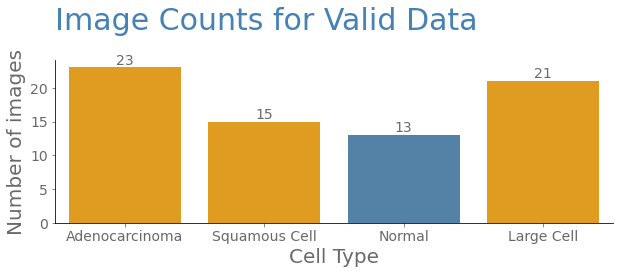

In [159]:
# visualize data
plt.figure(figsize=(10,3))
plot = sns.countplot(data=train_val_df[train_val_df['set']=='valid'], 
              x='type',
              order=train_val_df['type'].value_counts().index,
              palette={'squamous_cell_carcinoma':'orange', 
                     'normal':'steelblue', 
                     'large_cell_carcinoma':'orange',
                     'adeno_carcinoma':'orange'})
plt.title('Image Counts for Valid Data', loc='left', color='steelblue')
plt.xlabel('Cell Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['Adenocarcinoma', 'Squamous Cell', 'Normal', 'Large Cell'])
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='dimgrey', fontsize=14)
plt.show();

We first see above the image counts for each type of cell. We see that we have semi-balanced dataset. We will keep this in mind as we train our model (in the next notebook). To help with training, we will want to augment images to give the model more instances to train off of. 

In [162]:
#check  file types of images 
def check_image_type(string):
    ending = string.split('.')[-1]
    return ending

train_val_df['file_type'] = train_val_df['image'].apply(lambda string: check_image_type(string))

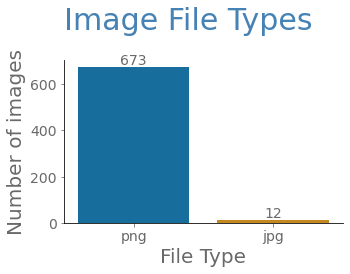

In [163]:
# visualize data
plt.figure(figsize=(5,3))
plot = sns.countplot(data=train_val_df, 
                    x='file_type',
                    palette='colorblind')
plt.title('Image File Types', loc='left', color='steelblue')
plt.xlabel('File Type')
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='dimgrey', fontsize=14)
plt.show();

I wanted to see what type of images we are working with and to what extent. We see most are .png files, and a few are .jpg. 

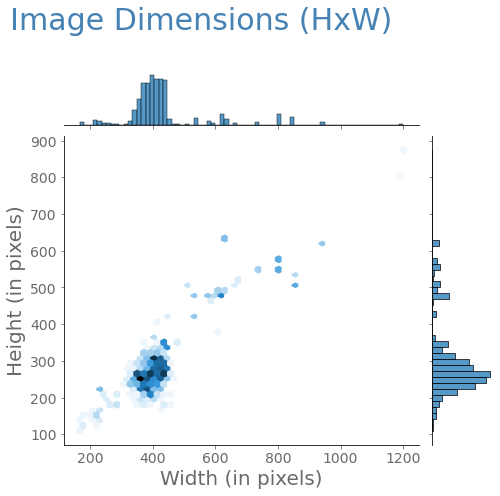

In [184]:
# visualize data
plot = sns.jointplot(data=train_val_df, 
                     y='image_height',
                     x='image_width',
                     kind='hex',
                     height=7,
                     palette='steelblue')
plot.fig.suptitle('Image Dimensions (HxW)', fontsize=30,
                  x=.4, color='steelblue')
plot.fig.subplots_adjust(top=0.85)
plt.xlabel('Width (in pixels)')
plt.ylabel('Height (in pixels)')
plt.show();

First, I wanted to see the general distribution of the height x width of the images. We see that most are about a 3:4 ratio but we do have a good number outside that range. This will be good to know for training because we will need to standardize the images. If we, for example, make all the images 300x400 we may lose some details in some images. For this reason, we will make sure to transform and augment the images to give a broad training range. 

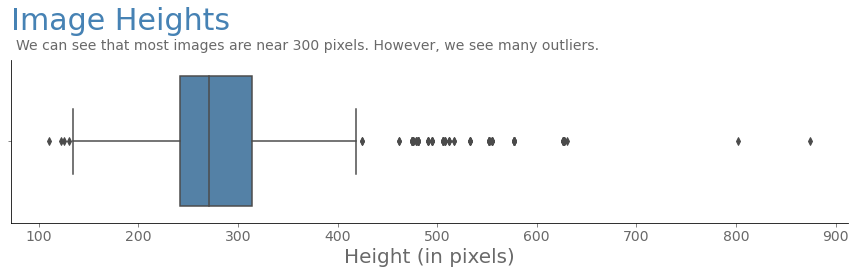

In [165]:
plt.figure(figsize=(15,3))

sns.boxplot(data=train_val_df, 
           x='image_height',
           color='steelblue')
plt.title('Image Heights', loc='left', color='steelblue')
plt.suptitle('We can see that most images are near 300 pixels. However, we see many outliers.',
            x=.13, color='dimgrey', fontsize=14, ha='left')
plt.xlabel('Height (in pixels)')
plt.show();

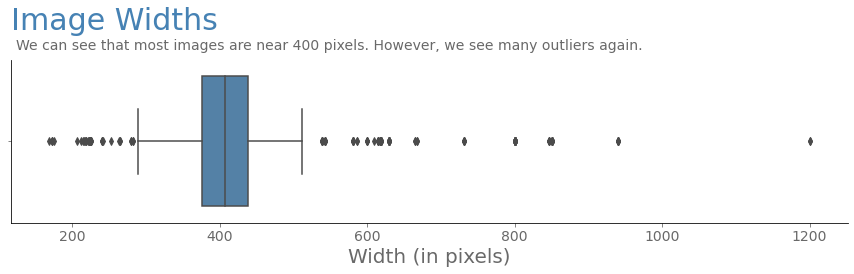

In [166]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train_val_df, 
           x='image_width',
           color='steelblue')
plt.title('Image Widths', loc='left', color='steelblue')
plt.suptitle('We can see that most images are near 400 pixels. However, we see many outliers again.',
            x=.13, color='dimgrey', fontsize=14, ha='left')
plt.xlabel('Width (in pixels)')
plt.show();

I wanted to see the boxplot plots of height and width to get a better feel of the distribution of data. We see there are outliers both directions. 

Now to the fun part! We have visualized 25 random images from the training/validation set. As a non-medical practicioner, I'm unable to see exactly what makes an image cancerous and what does not. For this reason, we will make another notebook which will use transfer learning to build a computer vision classification model! 

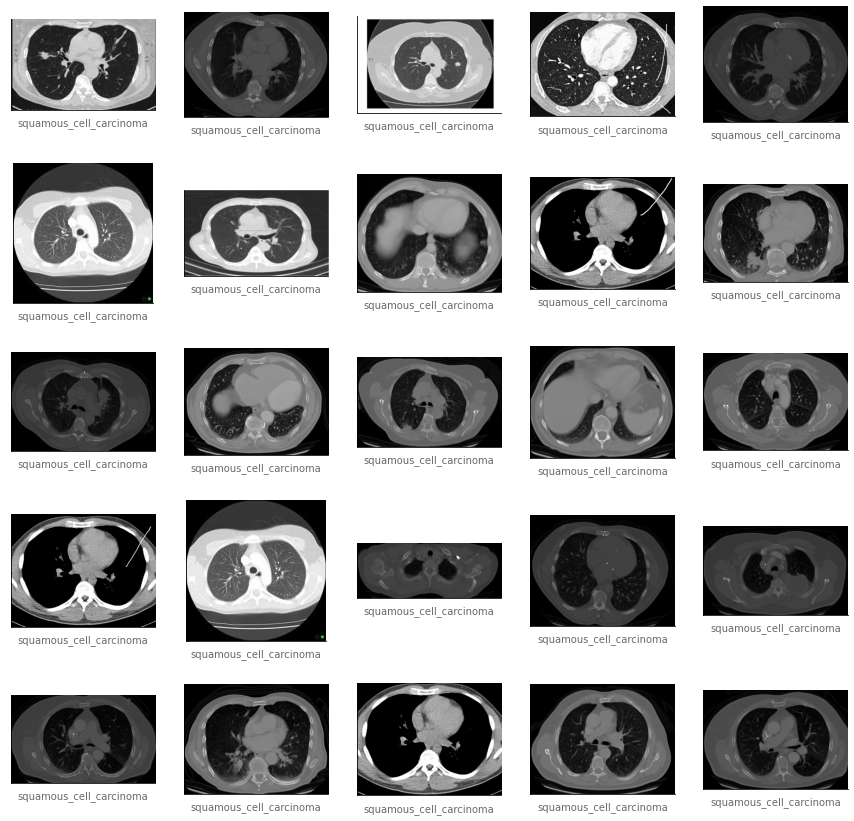

In [180]:
#finally, let's view some sample images! 
SEED = 49
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
images_to_sample = pd.DataFrame(train_val_df.sample(n=25, random_state=SEED))
images_to_sample.reset_index(inplace=True)
for i, axis in enumerate(ax.flat):
    if images_to_sample.set[i] == 'train':
        file = str(train_dir +'/'+ images_to_sample.type_extended[i] + '/' +images_to_sample.image[i])
    elif images_to_sample.set[i] == 'valid':
        file = str(valid_dir +'/'+ images_to_sample.type_extended[i] + '/' +images_to_sample.image[i])
    image = io.imread(file)
    axis.imshow(image)
    axis.set(xticks=[], yticks=[], xlabel=train_val_df.type[i])
    axis.xaxis.get_label().set_fontsize(10);

-- Fin --